1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

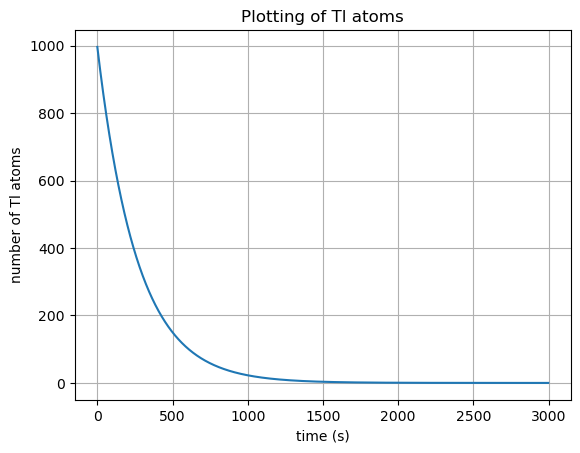

<Figure size 640x480 with 0 Axes>

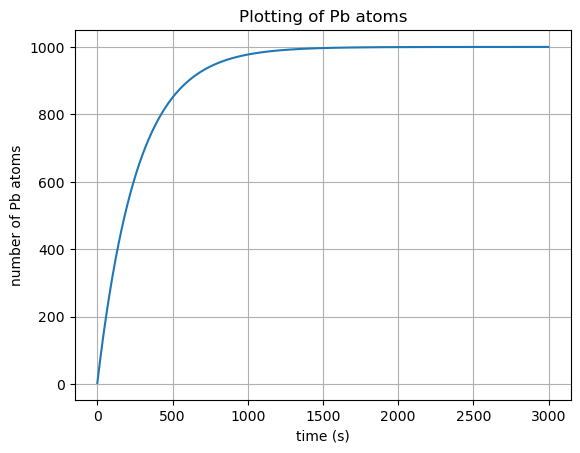

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#initial values
N = 1000
t = 1
start = 1
tau = 3.052*60
i = 0
list_Tl = []
list_Pb = []
while(t<3000 or start==1):
    start = 0
    Tl = N*(1-2**(-t/tau)) 
    list_Tl.append(1000-Tl)
    list_Pb.append(Tl)
    i = i+1
    t = t+1
t = np.arange(0,i,1)
fig, ax = plt.subplots()
ax.set(xlabel = 'time (s)', ylabel = 'number of Tl atoms',
       title = 'Plotting of Tl atoms')
ax.plot(t,list_Tl)
ax.grid()
plt.figure()
fig, ax1 = plt.subplots()
ax1.set(xlabel = 'time (s)', ylabel = 'number of Pb atoms',
       title = 'Plotting of Pb atoms')
ax1.plot(t,list_Pb)
ax1.grid()
plt.show()

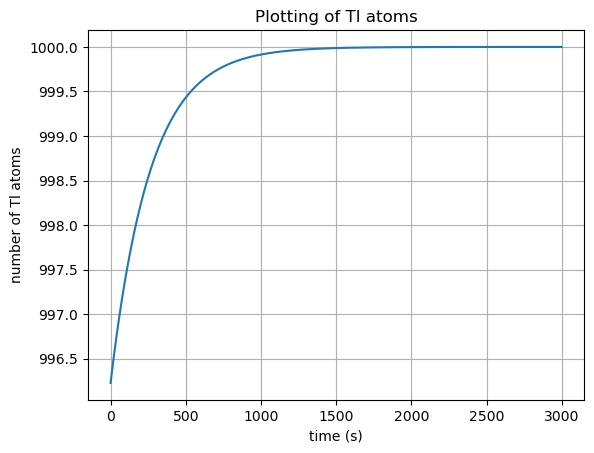

<Figure size 640x480 with 0 Axes>

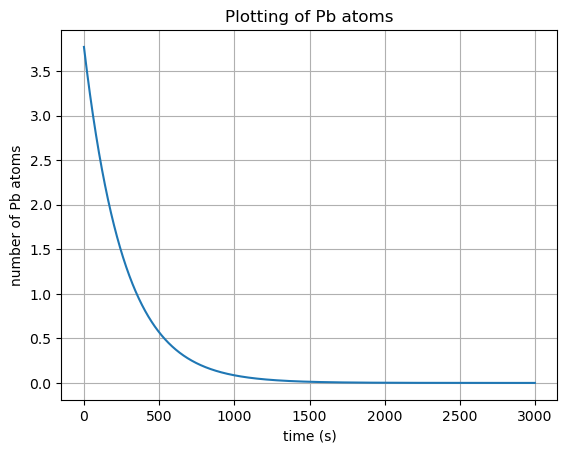

In [7]:
#Repeat the exercise by means of the inverse transform method
N = 1000
t = 1
start = 1
tau = 3.052*60
i = 0
list_Tl = []
list_Pb = []
while(t<3000 or start==1):
    start = 0
    Tl = N* (2**(-t/tau) * (np.log(2)/tau))
    list_Tl.append(1000-Tl)
    list_Pb.append(Tl)
    i = i+1
    t = t+1
t = np.arange(0,i,1)
fig, ax = plt.subplots()
ax.set(xlabel = 'time (s)', ylabel = 'number of Tl atoms',
       title = 'Plotting of Tl atoms')
ax.plot(t,list_Tl)
ax.grid()
plt.figure()
fig, ax1 = plt.subplots()
ax1.set(xlabel = 'time (s)', ylabel = 'number of Pb atoms',
       title = 'Plotting of Pb atoms')
ax1.plot(t,list_Pb)
ax1.grid()
plt.show()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

In [9]:
import math

def f(x):
    return (np.sin(1/(x * (2-x)))) ** 2
N = 10000
count = 0
for i in range(N):
    x = 2 * np.random.random()
    y = np.random.random()
    if y<f(x): count += 1
result = 2 * count / N
error = 0.6745 * math.sqrt(result * (2-result) / N)
print("Result of Integral :",result,"Error :",error)

#Repeat the integral with the mean value method
def f(x):
    return (math.sin(1 / (x * (2-x)))) ** 2
def integral(starting, ending, N):
    width = (float(ending) - float(starting)) / N
    Sum = 0
    for i in range(N):
        height = f(starting + i * width)
        area = height * width
        Sum += area
    return Sum
result = integral(0.0001,2,10000)
error = 0.6745 * math.sqrt(result * (2-result) / N)
print("Result of Integral :",result,"Error :",error)

Result of Integral : 1.4532 Error : 0.0060125527770194245
Result of Integral : 1.4510508516883263 Error : 0.006019900707352529


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [12]:
def f(x):
    return math.sqrt(1 - (x ** 2))
def integral(starting,ending,N):
    width = (float(ending) - float(starting)) / N
    Sum = 0
    for i in range(N):
        height = f(starting + i * width)
        area = height * width
        Sum += area
    return 2*Sum
result = integral(-1,1,10000)
error = 0.6745 * math.sqrt(result * (4-result) / N)
print("Result of Integral :",result,"Error :",error)

#Generalize the result for a 10D sphere.
def f(z):
    y=sum(x**2 for x in z)
    if y <=1: return 1
    else: return 0
N = 1000000
count=0
D=10
for i in range(N):
    x1=np.random.uniform(-1,1,D)
    if f(x1)==1: count+=1
volume=2**D
result=volume*(float(count)/float(N))
error = 0.6745*np.sqrt(result*(volume-result)/N)
print("Result of Integral :",result,"Error :",error)

Result of Integral : 3.141589327430582 Error : 0.0011076542411393667
Result of Integral : 2.490368 Error : 0.03402005024079103


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [13]:
N = 10000
def function(x):
    return x ** (-1/2) / (np.exp(x) + 1) 
def stp(x):
    return x * x/5
def w_function(x):
    if (x > 0):
        return 1 / np.sqrt(x)
random = np.random.uniform(0,2,N)
dividing = np.array([function(i) for i in stp(random)])
divider = np.array([w_function(i) for i in stp(random)])
result = 2/N * np.sum(dividing/divider)
print(result)

0.8693873325957877
